<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [3]:
# A:
X = [1,2,3,4,5,6,7,8,9,10]
Y = [.5,.7,.8,.99,1,1.4,1.8,2.1,2.4,2.9]


### Using that dictionary, create a pandas DataFrame and call it pre_df

In [4]:
# A:
d = {'X': X, 'Y': Y}
pre_df = pd.DataFrame(data = d)

In [5]:
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [6]:
# A:
X_new = [i + 10 for i in X]
Y_new = [i + 3 for i in Y]

d = {'X': X_new, 'Y': Y_new}
new_data = pd.DataFrame(data = d)

In [7]:
new_data

,X,Y
0,11,3.50
1,12,3.70
2,13,3.80
3,14,3.99
4,15,4.00
5,16,4.40
6,17,4.80
7,18,5.10
8,19,5.40
9,20,5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [8]:
# A:
df = pd.concat([pre_df, new_data], sort = False, ignore_index = True)

In [9]:

df


,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

Text(0.5, 1.0, 'X vs Y')

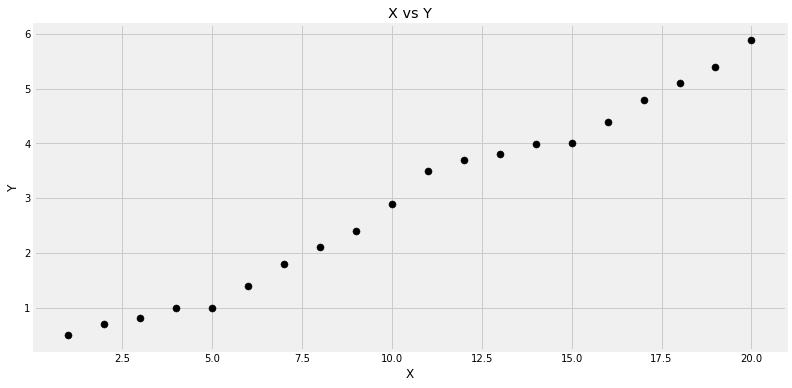

In [10]:
# A:
ax = df.plot(kind = 'scatter', x = 'X', y = 'Y', figsize = (12,6), s = 50, c = 'black')
ax.set_title('X vs Y')

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [11]:
# A:
endog = df['Y']
exog = sm.add_constant(df['X'])
model = sm.OLS(endog,exog)
results = model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           3.76e-18
Time:                        20:14:56   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0857      0.097     -0.880      0.3

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [12]:
# A: .986

### What is the p-value for your X?

In [13]:
# A: 0

### What is the intercept?

In [14]:
# A: -.0857

### Using the above, write the equation for our model

In [15]:
# A:
#Y = .29*(x) -.0857

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [16]:
# A:
.29*(20) - .0857


5.7143

In [17]:
# A:
.29*(21) - .0857

6.0043

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [18]:
# A: the api version of statsmodel automatically factors in a y intercept whereas regular statsmodel does not
import statsmodels.formula.api as smf


smresults = smf.ols('Y ~ X',df).fit()
df['Ypred'] = smresults.predict()


In [19]:
smresults.predict(pd.DataFrame({'X':[20,21]}))

0    5.713714
1    6.003684
dtype: float64

In [20]:
df

,X,Y,Ypred
0,1,0.50,0.204286
1,2,0.70,0.494256
2,3,0.80,0.784226
3,4,0.99,1.074195
4,5,1.00,1.364165
5,6,1.40,1.654135
6,7,1.80,1.944105
7,8,2.10,2.234075
8,9,2.40,2.524045
9,10,2.90,2.814015


### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [21]:
# A:
from sklearn import metrics


print('MSE:', metrics.mean_squared_error(df['Y'], df['Ypred']))
print('Thus the SSE is the MSE * n, which is:', metrics.mean_squared_error(df['Y'], df['Ypred'])*20 )

MSE: 0.03958396992481204
Thus the SSE is the MSE * n, which is: 0.7916793984962409


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

C:\Users\Daniel_Heffley\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


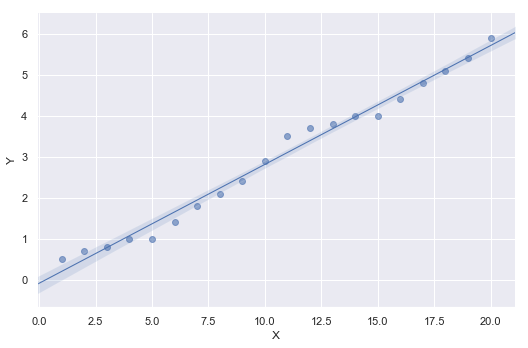

In [22]:
# A:
sns.set(rc={"lines.linewidth": 0.7})
sns.lmplot(x='X', y='Y', data=df, aspect=1.5, scatter_kws={'alpha':0.6});

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [47]:
# A:
import sklearn
poly = sklearn.preprocessing.PolynomialFeatures(degree = 5)
X_reshape = df.X.values.reshape(-1,1)
poly_feats = poly.fit_transform(X_reshape)
print(poly_feats)

[[1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01
  2.430000e+02]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02
  1.024000e+03]
 [1.000000e+00 5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02
  3.125000e+03]
 [1.000000e+00 6.000000e+00 3.600000e+01 2.160000e+02 1.296000e+03
  7.776000e+03]
 [1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02 4.096000e+03
  3.276800e+04]
 [1.000000e+00 9.000000e+00 8.100000e+01 7.290000e+02 6.561000e+03
  5.904900e+04]
 [1.000000e+00 1.000000e+01 1.000000e+02 1.000000e+03 1.000000e+04
  1.000000e+05]
 [1.000000e+00 1.100000e+01 1.210000e+02 1.331000e+03 1.464100e+04
  1.610510e+05]
 [1.000000e+00 1.200000e+01 1.440000e+02 1.728000e+03 2.073600e+04
  2.488320e+05]
 [1.

In [50]:
# A:
poly_X = pd.DataFrame(data = poly_feats)
poly_X


,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0
8,1.0,9.0,81.0,729.0,6561.0,59049.0
9,1.0,10.0,100.0,1000.0,10000.0,100000.0


In [57]:
# A:

pdf = pd.merge(df[['Y']], poly_X, left_index=True, right_index=True)
pdf

,Y,0,1,2,3,4,5
0,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.00,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.40,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.80,1.0,7.0,49.0,343.0,2401.0,16807.0
7,2.10,1.0,8.0,64.0,512.0,4096.0,32768.0
8,2.40,1.0,9.0,81.0,729.0,6561.0,59049.0
9,2.90,1.0,10.0,100.0,1000.0,10000.0,100000.0


### Using statsmodels as before, fit this new model and save it as poly_results

In [63]:
# A:
endog = pdf['Y']
#exog = sm.add_constant(df['X'])
#exog = [pdf[0],pdf[1],pdf[2],pdf[3],pdf[4],pdf[5]]
model = sm.OLS(endog,poly_feats)
results = model.fit()
print(results.summary())
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     572.4
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.15e-15
Time:                        20:58:34   Log-Likelihood:                 14.451
No. Observations:                  20   AIC:                            -16.90
Df Residuals:                      14   BIC:                            -10.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5702      0.312      1.827      0.0

### Print out the model's predictions and save them as poly_yhat

In [76]:
# A:

poly_yhat = results.predict(poly_feats)
Ypred_poly = pd.Series(poly_yhat)
df['Ypred_poly'] = Ypred_poly
df

,X,Y,Ypred,Ypred_poly
0,1,0.50,0.204286,0.574523
1,2,0.70,0.494256,0.623835
2,3,0.80,0.784226,0.733296
3,4,0.99,1.074195,0.908667
4,5,1.00,1.364165,1.147914
5,6,1.40,1.654135,1.442831
6,7,1.80,1.944105,1.780648
7,8,2.10,2.234075,2.145656
8,9,2.40,2.524045,2.520816
9,10,2.90,2.814015,2.889383


### Calculate the SSE

In [72]:
# A:
print('MSE:', metrics.mean_squared_error(df['Y'], poly_yhat))
print('Thus the SSE is the MSE * n, which is:', metrics.mean_squared_error(df['Y'], poly_yhat)*20 )

MSE: 0.01380152253637476
Thus the SSE is the MSE * n, which is: 0.2760304507274952


### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

[array([0.5 , 0.7 , 0.8 , 0.99, 1.  , 1.4 , 1.8 , 2.1 , 2.4 , 2.9 , 3.5 ,
        3.7 , 3.8 , 3.99, 4.  , 4.4 , 4.8 , 5.1 , 5.4 , 5.9 ])]

In [147]:
# A: I can't figure out why this doesn't work
from sklearn.linear_model import Ridge
alphas = [0, .001, .01, .25, .5, 1 , 10]
for a in alphas:
    '''
    endog = df['Y']
    exog = sm.add_constant(df['X'])
    model = sm.OLS.fit_regularized(endog,exog,alpha = a, L1_wt = 0)
    #model = sm.OLS(endog,exog).fit_regularized(alpha = a, L1_wt = 0)
    results = model.fit()
    print(a, 'is the alpha value')
    print('The SSE is:', metrics.mean_squared_error(df['Y'], df['X'])*20 )
    print('The mean absolute value is:', metrics.mean_absolute_error(df['Y'], df['X']))
    '''




# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
    ridgereg = Ridge(alpha=a, normalize=True)

# Fit the model.
    model = ridgereg.fit([df.X], [df.Y])
    print('alpha is', a)
    pred = model.predict([df.X])
    print(pred)
    #print('The SSE is:', metrics.mean_squared_error(pred, df['X'])*20 )  I don't know why this doesnt work
    #print('The mean absolute value is:', metrics.mean_absolute_error(pred, df['X']))

alpha is 0
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]
alpha is 0.001
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]
alpha is 0.01
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]
alpha is 0.25
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]
alpha is 0.5
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]
alpha is 1
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]
alpha is 10
[[0.5  0.7  0.8  0.99 1.   1.4  1.8  2.1  2.4  2.9  3.5  3.7  3.8  3.99
  4.   4.4  4.8  5.1  5.4  5.9 ]]


C:\Users\Daniel_Heffley\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [152]:
# A:

In [153]:
# A:

In [154]:
# A: